In [1]:
import pandas as pd
import seaborn as sns


In [3]:
!pwd

/storage/store/work/lgrinszt/TabPFN/tabpfn


In [2]:
results = pd.read_csv('results.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'results.csv'

In [ ]:
results["model"].unique()

array(['Random Forest', 'Gradient Boosting', 'Logistic Regression',
       'TabPFN', 'TabPFNne', 'default35970_260', 'trees13368_60',
       'trees456_390', 'trees66554_75', 'mlp60400_160', 'mlp71353_400',
       'trees13368_60_no_prepro', 'trees456_390_no_prepro',
       'trees13368_60_no_prepro2', 'trees456_390_no_prepro2',
       'TabPFNno_prepro', 'default35702_250_no_prepro2',
       'trees79428_250_no_prepro2', 'default35702_250', 'trees79428_250',
       'trees13368_15'], dtype=object)

In [32]:
results = pd.read_csv('tabpfn/results_benchmark.csv')
results = results[results["metric"] == "accuracy"]
results["accuracy"] = results["value"]
results = results[results["suite_id"] == "337"]
# results_large["suite_id"] = "337"
# results_large["model"] = results_large["model"] + "_large"
# # replce model "checkpoint" by trees
# results = pd.concat([results, results_large])
# results = results[results["suite_id"] == "337"]

In [33]:
models_to_show = ["trees7329_6qspdk92_400", "trees97149_stz4qj1z_180", "trees676_obqe7mfl_350", "tabpfn", "gbt"]

In [35]:
results["model"].unique()

array(['tabpfn_trees13368_60', 'checkpoint', 'trees24451_220',
       'trees55166_49voozm8_390', 'trees69859_eouc70o7_390',
       'trees55166_49voozm8_220', 'trees69859_eouc70o7_390prepro',
       'trees69859_eouc70o7_390_random_rotation',
       'tabpfn_random_rotation', 'gbt_random_rotation', 'log_reg',
       'mlp_sklearn', 'trees73904_ba9wuzhe_390', 'trees4315_080m7u0l_390',
       'trees97149_stz4qj1z_180', 'trees7329_6qspdk92_400'], dtype=object)

In [ ]:
pivoted = results.pivot(index=None, columns='metric', values='value')

In [ ]:
results

In [ ]:
pivoted.fillna(method='ffill').columns

In [ ]:
pivoted.fillna(method='ffill').drop_duplicates(subset=["accuracy", "roc_auc"])

In [ ]:
results_337 = results[results["suite_id"] == "337"]
results_334 = results[results["suite_id"] == "334"]
results_cc18 = results[results["suite_id"] == "cc18"]

In [ ]:
results_337.head()

In [ ]:
results[results["model"].isin(["tabpfn_trees13368_60", "tabpfn", "gbt"])]

In [10]:
results["model"].unique()

array(['tabpfn_trees13368_60', 'tabpfn', 'gbt', 'checkpoint'],
      dtype=object)

<Axes: xlabel='task_id', ylabel='accuracy'>

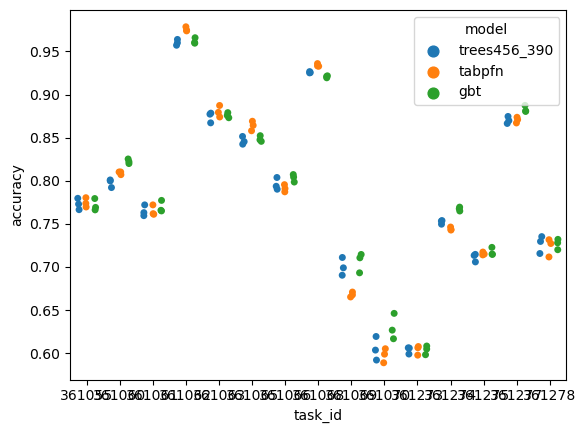

In [51]:
#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results[results["model"].isin(["tabpfn", "tabpfn_large", "gbt", "gbt_large", "checkpoint", "trees456_390_large", "trees456_390"])],
              dodge=True)

In [33]:
results["task_id"].unique()

array(['361055', '361060', '361061', '361062', '361063', '361065',
       '361066', '361068', '361069', '361070', '361273', '361274',
       '361275', '361277', '361278'], dtype=object)

,Unnamed: 0.13,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,...,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,suite_id,task_id,seed,metric,value,model,accuracy
2232,2232,2232.0,2232.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361055,0,accuracy,0.765931,trees69859_eouc70o7_390,0.765931
2234,2234,2234.0,2234.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361055,1,accuracy,0.761809,trees69859_eouc70o7_390,0.761809
2236,2236,2236.0,2236.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361055,2,accuracy,0.751894,trees69859_eouc70o7_390,0.751894
2238,2238,2238.0,2238.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361060,0,accuracy,0.782754,trees69859_eouc70o7_390,0.782754
2240,2240,2240.0,2240.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361060,1,accuracy,0.778743,trees69859_eouc70o7_390,0.778743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361277,1,accuracy,0.786208,trees69859_eouc70o7_390_random_rotation,0.786208
3250,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361277,2,accuracy,0.778966,trees69859_eouc70o7_390_random_rotation,0.778966
3252,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361278,0,accuracy,0.686832,trees69859_eouc70o7_390_random_rotation,0.686832
3254,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361278,1,accuracy,0.680704,trees69859_eouc70o7_390_random_rotation,0.680704


<Axes: xlabel='accuracy', ylabel='task_id'>

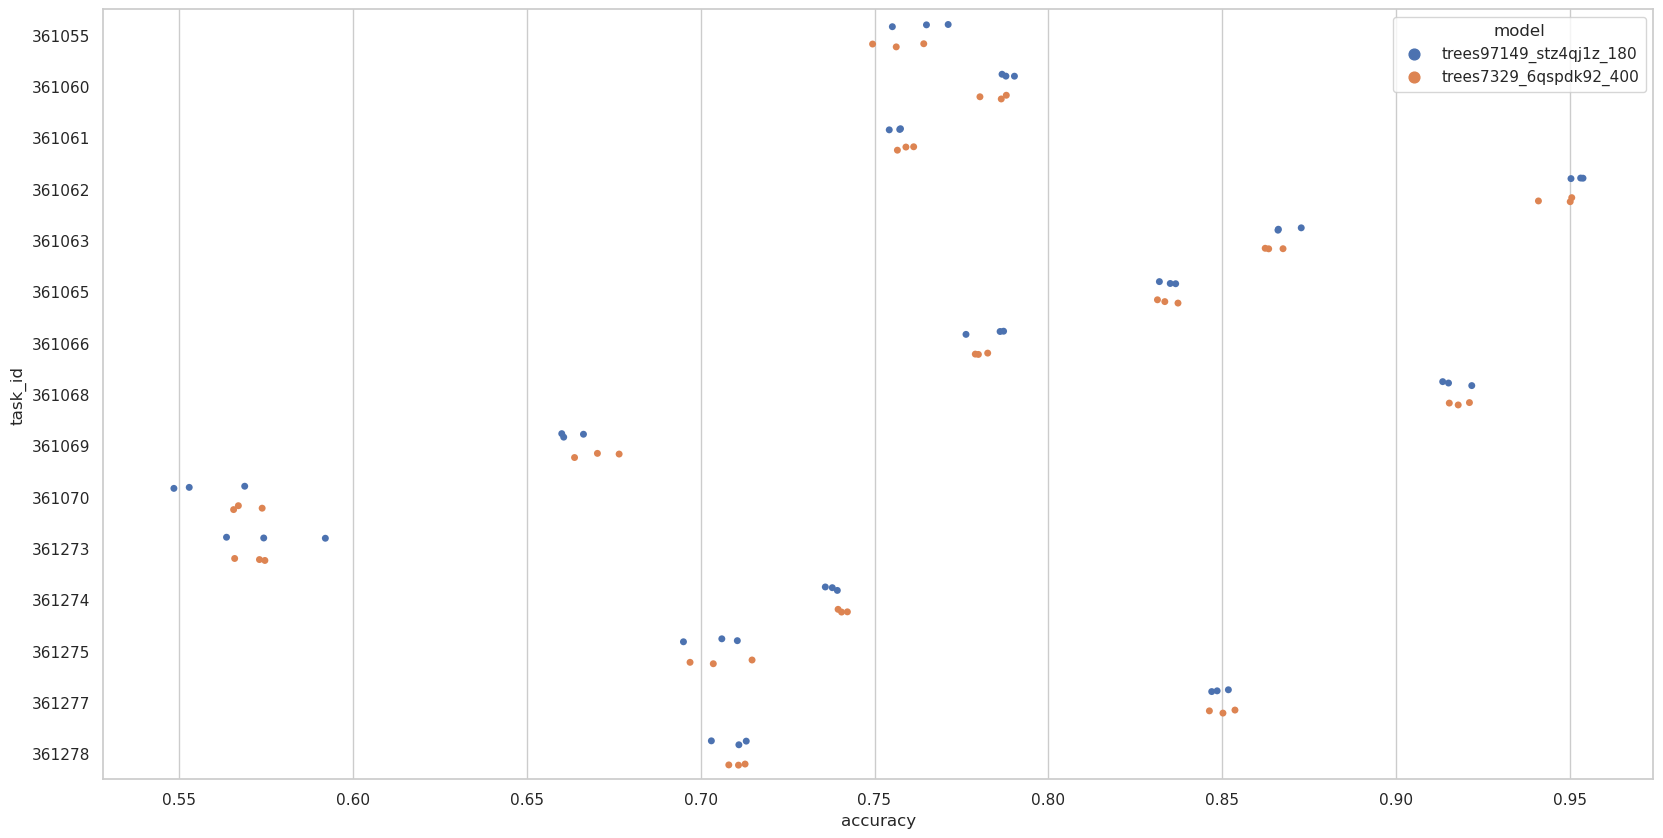

In [34]:
# plot the results
# score in y
# task_id in x
# hue is the model
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
# bigger plot
plt.figure(figsize=(20, 10))
# accuracy

#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(y="task_id", x="accuracy", hue="model", 
              #data=results[results["model"].isin(["trees69859_eouc70o7_390", "trees69859_eouc70o7_390_random_rotation", "tabpfn", "tabpfn_random_rotation", "gbt", "gbt_random_rotation"])],
              #data=results[results["model"].isin(["trees73904_ba9wuzhe_390", "trees4315_080m7u0l_390", "trees69859_eouc70o7_390", "trees676_obqe7mfl_350", "tabpfn", "gbt", "log_reg"])],
              data=results[results["model"].isin(models_to_show)],
              dodge=True)
# plot horizontal lines for the different tasks
# unique_tasks = results["task_id"].unique()
# for task in unique_tasks:
#     task_index = list(unique_tasks).index(task)
#     if int(task) in datasets_with_more_than_two_classes:
#         plt.axhline(y=task_index + 0.5, color='red', linestyle='--', linewidth=0.7)
#     else:
#         plt.axhline(y=task_index + 0.5, color='grey', linestyle='--', linewidth=0.7)

In [27]:
# Compute mean rank of each model
#results = results_337[results_337["metric"] == "accuracy"]
# group by model and task_id, and compute the mean accuracy
mean_acc = results[results["model"].isin(models_to_show)].groupby(['model', 'task_id']).mean()


# sort the resulting dataframe by model and accuracy
sorted_acc = mean_acc.sort_values(['model', 'value'], ascending=[True, False])

# assign ranks to each model based on sorted order of accuracy
sorted_acc['rank'] = sorted_acc.groupby('task_id')['value'].rank(method='dense', ascending=False)


# compute the mean rank for each model
mean_rank = sorted_acc.groupby('model')['rank'].mean()

mean_rank

/tmp/ipykernel_38278/2866083971.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_acc = results[results["model"].isin(models_to_show)].groupby(['model', 'task_id']).mean()


model
gbt                      1.866667
tabpfn                   2.200000
trees676_obqe7mfl_350    1.933333
Name: rank, dtype: float64

In [28]:
import pandas as pd

# compute the maximum and minimum accuracy for each task
task_acc_range = results[results["model"].isin(models_to_show)].groupby('task_id')['accuracy'].agg(['max', 'min'])

# merge the maximum and minimum accuracy with the original dataframe
merged_df = pd.merge(results[results["model"].isin(models_to_show)], task_acc_range, on='task_id')

# compute the range of accuracy for each task
merged_df['range'] = merged_df['max'] - merged_df['min']

# compute the normalized accuracy for each task
merged_df['normalized_accuracy'] = (merged_df['accuracy'] - merged_df['min']) / merged_df['range']

# compute the mean normalized accuracy for each model
mean_normalized_acc = merged_df.groupby('model')['normalized_accuracy'].mean()

print(mean_normalized_acc)


model
gbt                      0.534854
tabpfn                   0.412956
trees676_obqe7mfl_350    0.514155
Name: normalized_accuracy, dtype: float64


In [1]:
from tabpfn import TabPFNClassifier

In [2]:
TabPFNClassifier()

Using style prior: True
{'recompute_attn': True}
<module 'wandb' from '/home/soda/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/wandb/__init__.py'>
Using cpu device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7fb56113aee0>, 'seq_len_maximum': 10, 'device': 'cpu', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'norm

TabPFNClassifier()

In [4]:
config = TabPFNClassifier().c

Using style prior: True
{'recompute_attn': True}
<module 'wandb' from '/home/soda/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/wandb/__init__.py'>
Using cpu device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7fe4b1a401f0>, 'seq_len_maximum': 10, 'device': 'cpu', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'norm

In [6]:
config["num_steps"]

8192

In [11]:
config["epochs"]

400

In [12]:
for key in config:
    if "aggregate" in key:
        print(key, config[key])

aggregate_k_gradients 8


In [16]:
import openml

dataset_ids = [
    11, 14, 15, 16, 18, 22, 23, 29, 31, 37, 50, 54, 188, 458, 469,
    1049, 1050, 1063, 1068, 1510, 1494, 1480, 1462, 1464, 6332,
    23381, 40966, 40982, 40994, 40975
]
datasets_with_more_than_two_classes = []
for id in dataset_ids:
    dataset = openml.datasets.get_dataset(id)
    # get the number of classes
    if dataset.qualities["NumberOfClasses"] != 2:
        print(id, dataset.name, dataset.qualities["NumberOfClasses"])
        datasets_with_more_than_two_classes.append(id)

11 balance-scale 3.0
14 mfeat-fourier 10.0
16 mfeat-karhunen 10.0
18 mfeat-morphological 10.0
22 mfeat-zernike 10.0
23 cmc 3.0
54 vehicle 4.0
188 eucalyptus 5.0
458 analcatdata_authorship 4.0
469 analcatdata_dmft 6.0
40966 MiceProtein 8.0
40982 steel-plates-fault 7.0
40975 car 4.0


In [65]:
from tabpfn import TabPFNClassifier
model = TabPFNClassifier()

Using style prior: True
{'recompute_attn': True}
Using cpu device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7efdd48ac040>, 'seq_len_maximum': 10, 'device': 'cpu', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'normalize_to_ranking': False, 'set_value_to_nan': 0.1, 'normalize_by_used_features': True, 'num_features_used': <function load

In [66]:
model.c

{'lr': 0.0001,
 'dropout': 0.0,
 'emsize': 512,
 'batch_size': 1,
 'nlayers': 12,
 'num_features': 100,
 'nhead': 4,
 'nhid_factor': 2,
 'bptt': 10,
 'eval_positions': [9],
 'seq_len_used': 50,
 'sampling': 'mixed',
 'epochs': 400,
 'num_steps': 8192,
 'verbose': False,
 'mix_activations': True,
 'nan_prob_unknown_reason_reason_prior': 1.0,
 'categorical_feature_p': 0.2,
 'nan_prob_no_reason': 0.0,
 'nan_prob_unknown_reason': 0.0,
 'nan_prob_a_reason': 0.0,
 'max_num_classes': 10,
 'num_classes': 2,
 'noise_type': 'Gaussian',
 'balanced': False,
 'normalize_to_ranking': False,
 'set_value_to_nan': 0.1,
 'normalize_by_used_features': True,
 'num_features_used': <function create_model.load_model_no_train.<locals>.<lambda>()>,
 'num_categorical_features_sampler_a': -1.0,
 'differentiable_hyperparameters': {'prior_bag_exp_weights_1': {'distribution': 'uniform',
   'min': 1000000.0,
   'max': 1000001.0},
  'num_layers': {'distribution': 'meta_trunc_norm_log_scaled',
   'max_mean': 6,
   'mi

In [69]:
from create_model import load_model_no_train
device = "cuda:0"
checkpoint = "trees73904_ba9wuzhe_390"
model = TabPFNClassifier(device=device, no_preprocess_mode=True)
model_pytorch = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, model.c, 0)[0]

Using style prior: True
{'recompute_attn': True}
Using cuda:0 device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7efdd4507550>, 'seq_len_maximum': 10, 'device': 'cuda:0', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'normalize_to_ranking': False, 'set_value_to_nan': 0.1, 'normalize_by_used_features': True, 'num_features_used': <functio

In [78]:
# find the number of parameters
s = 0
for name, param in model_pytorch[2].named_parameters():
    print(name, param.numel())
    s += param.numel()
    
print(s / 1e6)

transformer_encoder.layers.0.self_attn.in_proj_weight 786432
transformer_encoder.layers.0.self_attn.in_proj_bias 1536
transformer_encoder.layers.0.self_attn.out_proj.weight 262144
transformer_encoder.layers.0.self_attn.out_proj.bias 512
transformer_encoder.layers.0.linear1.weight 524288
transformer_encoder.layers.0.linear1.bias 1024
transformer_encoder.layers.0.linear2.weight 524288
transformer_encoder.layers.0.linear2.bias 512
transformer_encoder.layers.0.norm1.weight 512
transformer_encoder.layers.0.norm1.bias 512
transformer_encoder.layers.0.norm2.weight 512
transformer_encoder.layers.0.norm2.bias 512
transformer_encoder.layers.1.self_attn.in_proj_weight 786432
transformer_encoder.layers.1.self_attn.in_proj_bias 1536
transformer_encoder.layers.1.self_attn.out_proj.weight 262144
transformer_encoder.layers.1.self_attn.out_proj.bias 512
transformer_encoder.layers.1.linear1.weight 524288
transformer_encoder.layers.1.linear1.bias 1024
transformer_encoder.layers.1.linear2.weight 524288
tr

In [80]:
model.c["num_classes_in_training"]

2

In [81]:
model.c["num_classes"]

2

In [82]:
model.c["max_num_classes"]

10